In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploratory

In [2]:
clients = pd.read_csv('data/Clients.csv')
employers = pd.read_csv('data/Employers.csv')

compensation = pd.read_csv('data/Compensation.csv')
expenditures_hosting = pd.read_csv('data/Expenditures_Hosting.csv')
expenditures_small = pd.read_csv('data/Expenditures_Small.csv')
expenditures_large = pd.read_csv('data/Expenditures_Large.csv')

lobbying_activity = pd.read_csv('data/Lobbying_Activity.csv')
lobbyist_employer_client_combos = pd.read_csv('data/Lobbyist_Employer_Client_Combinations.csv')
lobbyists = pd.read_csv('data/Lobbyists.csv')
lobbyists_by_client = pd.read_csv('data/Lobbyists_By_Client.csv')

In [3]:
lobbyists.head()

,YEAR,LOBBYIST_ID,SALUTATION,FIRST_NAME,MIDDLE_INITIAL,LAST_NAME,SUFFIX,ADDRESS_1,ADDRESS_2,CITY,STATE,ZIP,COUNTRY,EMAIL,PHONE,FAX,EMPLOYER_ID,EMPLOYER_NAME,CREATED_DATE
0,2020,25061,MS.,VINCENZA,M,RAINERI,NaN,4721 N WASHTENAW,1ST FLOOR,CHICAGO,IL,60625,United States,enzaraineri@yahoo.com,7734999723,NaN,1422664373,VINCENZA RAINERI,12/01/2020
1,2020,24920,NaN,KATRINA,NaN,STEELE,NaN,"ONE FINANCIAL PLACE 440 S. LASALLE, STE 3300",NaN,CHICAGO,IL,60605,United States,Katrina.Steele@ComEd.com,708-705-3762,NaN,306922044,COMED,07/27/2020
2,2020,23981,NaN,ALEXANDRA,NaN,SIMS,NaN,318 W ADAMS ST,500C,CHICAGO,IL,60606,United States,alex@apsandassociates.com,2485350159,NaN,2498319453,VERIZON,12/01/2020
3,2020,4273,MR.,JACK,L,PARRINO,ESQ,"55 E. MONROE ST., 37TH FLR",NaN,CHICAGO,IL,60603,United States,jparrino@thompsoncoburn.com,312-346-7500,312-580-2201,2639700130,THOMPSON COBURN LLP,12/03/2020
4,2020,24798,NaN,JESSICA,NaN,SULLIVAN-WILSON,NaN,351 W. HUBBARD STREET,SUITE 805,CHICAGO,IL,60654,United States,jsullivan@e4e.org,219-455-4312,NaN,4196459327,EDUCATORS FOR EXCELLENCE,03/03/2020


### There are far more lobbyists in 2020

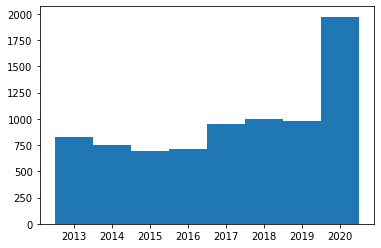

In [4]:
plt.hist(lobbyists['YEAR'], bins=8, align='left');

In [5]:
lobbying_activity.head()

,LOBBYING_ACTIVITY_ID,PERIOD_START,PERIOD_END,ACTION,ACTION_SOUGHT,DEPARTMENT,CLIENT_ID,CLIENT_NAME,LOBBYIST_ID,LOBBYIST_FIRST_NAME,LOBBYIST_MIDDLE_INITIAL,LOBBYIST_LAST_NAME,CREATED_DATE
0,945881620,01/01/2020,03/31/2020,LEGISLATIVE,INFORMATION GATHERINGH,CITY COUNCIL / ALDERMEN,2014063902,VERIZON WIRELESS,23981,ALEXANDRA,NaN,SIMS,12/01/2020
1,22717224,07/01/2020,09/30/2020,ADMINISTRATIVE,CONSTRUCTION,WATER MANAGEMENT,2014063902,VERIZON WIRELESS,23981,ALEXANDRA,NaN,SIMS,12/01/2020
2,2569808314,04/01/2020,06/30/2020,ADMINISTRATIVE,INFORMATION GATHERING,CITY COUNCIL / ALDERMEN,2014063902,VERIZON WIRELESS,23981,ALEXANDRA,NaN,SIMS,12/01/2020
3,2415484915,10/01/2019,12/31/2019,BOTH (ADMINISTRATIVE AND LEGISLATIVE),ISSUE ON PROPERTY TAX,CITY COUNCIL / ALDERMEN,4117437923,PEPSI COLA GENERAL BOTTLERS,4064,WILLIAM,M,FILAN,03/05/2020
4,1704436206,04/01/2020,06/30/2020,ADMINISTRATIVE,DRIVEWAY,TRANSPORTATION,2771309331,JUSTFOODFORDOGS,4316,BERNARD,I,CITRON,12/03/2020


### How many clients are represented vs how many lobbying activities took place?

In [6]:
print("Clients: ", lobbying_activity['CLIENT_ID'].unique().shape[0])
print("Activities: ", lobbying_activity.shape[0])

Clients:  5699
Activities:  78709


# Which Clients Have The Most Lobbying Activity Each Year?

In [7]:
lobbying_activity['PERIOD_START'] = pd.to_datetime(lobbying_activity['PERIOD_START'])
lobbying_activity['PERIOD_END'] = pd.to_datetime(lobbying_activity['PERIOD_END'])

In [8]:
lobbying_activity.head()

,LOBBYING_ACTIVITY_ID,PERIOD_START,PERIOD_END,ACTION,ACTION_SOUGHT,DEPARTMENT,CLIENT_ID,CLIENT_NAME,LOBBYIST_ID,LOBBYIST_FIRST_NAME,LOBBYIST_MIDDLE_INITIAL,LOBBYIST_LAST_NAME,CREATED_DATE
0,945881620,2020-01-01,2020-03-31,LEGISLATIVE,INFORMATION GATHERINGH,CITY COUNCIL / ALDERMEN,2014063902,VERIZON WIRELESS,23981,ALEXANDRA,NaN,SIMS,12/01/2020
1,22717224,2020-07-01,2020-09-30,ADMINISTRATIVE,CONSTRUCTION,WATER MANAGEMENT,2014063902,VERIZON WIRELESS,23981,ALEXANDRA,NaN,SIMS,12/01/2020
2,2569808314,2020-04-01,2020-06-30,ADMINISTRATIVE,INFORMATION GATHERING,CITY COUNCIL / ALDERMEN,2014063902,VERIZON WIRELESS,23981,ALEXANDRA,NaN,SIMS,12/01/2020
3,2415484915,2019-10-01,2019-12-31,BOTH (ADMINISTRATIVE AND LEGISLATIVE),ISSUE ON PROPERTY TAX,CITY COUNCIL / ALDERMEN,4117437923,PEPSI COLA GENERAL BOTTLERS,4064,WILLIAM,M,FILAN,03/05/2020
4,1704436206,2020-04-01,2020-06-30,ADMINISTRATIVE,DRIVEWAY,TRANSPORTATION,2771309331,JUSTFOODFORDOGS,4316,BERNARD,I,CITRON,12/03/2020


In [9]:
from collections import Counter

lob_by_client = {}
for client_name in lobbying_activity['CLIENT_NAME']:
    if client_name in lob_by_client:
        lob_by_client[client_name] = lob_by_client[client_name] + 1
    else:
        lob_by_client[client_name] = 1

lob_by_client_counter = Counter(lob_by_client)

### View 10 most active lobbying clients in total dataset w/ number of activities

In [10]:
lob_by_client_counter.most_common(10)

[('CHICAGO CUBS BASEBALL CLUB, LLC', 2995),
 ('NORTHSIDE ENTERTAINMENT HOLDINGS, LLC', 2834),
 ('HSC PLAZA AND BUILDING OPERATIONS LLC', 2774),
 ('HICKORY STREET DEVELOPMENT LLC', 2762),
 ('INTERSTATE JCDECAUX, LLC', 1163),
 ('ILLINOIS RESTAURANT ASSOCIATION', 951),
 ('STERLING BAY, LLC AND ITS AFFILIATES', 846),
 ('PUBLIC BUILDING COMMISSION OF CHICAGO', 579),
 ('CHICAGO ASSOCIATION OF REALTORS', 497),
 ('CHICAGO BOARD OF EDUCATION', 413)]

### Partition dataset by year

In [11]:
years = lobbying_activity['PERIOD_START'].dt.year.unique()
lob_act_dict = {}

for year in years:
    lob_act_dict[year] = lobbying_activity[lobbying_activity['PERIOD_START'].dt.year == year]

### See which 10 clients did the most lobbying each year

In [12]:
# returns a Counter object that provides easy querying of how many lobbying activities each client engaged in
def get_client_counter(lob_act):
    lob_by_client = {}
    for client_name in lob_act['CLIENT_NAME']:
        if client_name in lob_by_client:
            lob_by_client[client_name] = lob_by_client[client_name] + 1
        else:
            lob_by_client[client_name] = 1
    
    return Counter(lob_by_client)

In [13]:
for year in sorted(lob_act_dict.keys()):
    print()
    print(year, ":")
    most_common = get_client_counter(lob_act_dict[year]).most_common(10)
    for pair in most_common:
        print(pair)


2013 :
('INTERSTATE JCDECAUX, LLC', 197)
('PRESENCE HEALTH SYSTEM', 75)
('LOYOLA UNIVERSITY CHICAGO', 61)
('UNIVERSITY OF CHICAGO', 56)
('CHICAGO PARKING METERS LLC', 55)
('ILLINOIS RESTAURANT ASSOCIATION', 54)
('CHICAGO ASSOCIATION OF REALTORS', 54)
('AT&T ILLINOIS', 53)
('WAL-MART STORES, INC.', 52)
('METROPOLITAN CHICAGO HEALTHCARE COUNCIL', 48)

2014 :
('INTERSTATE JCDECAUX, LLC', 184)
('ILLINOIS RESTAURANT ASSOCIATION', 95)
('PRESENCE HEALTH SYSTEM', 81)
('BUILDING OWNERS & MANAGERS ASSOC. OF CHICAGO (BOMA)', 61)
('CHICAGOLAND APARTMENT ASSOCIATION', 54)
('DEPAUL UNIVERSITY', 51)
('AT&T ILLINOIS', 50)
('WAL-MART STORES, INC.', 48)
('ILLINOIS RETAIL MERCHANTS ASSOCIATION', 47)
('STERLING BAY COMPANIES', 47)

2015 :
('INTERSTATE JCDECAUX, LLC', 157)
('CHICAGO ASSOCIATION OF REALTORS', 71)
('ILLINOIS RESTAURANT ASSOCIATION', 68)
('PRESENCE HEALTH SYSTEM', 58)
('CHICAGOLAND APARTMENT ASSOCIATION', 50)
('DEPAUL UNIVERSITY', 49)
('BUILDING OWNERS & MANAGERS ASSOC. OF CHICAGO (BOMA)', 4

# Which Clients Had The Most Money Spent On Their Behalf?

In [14]:
compensation['PERIOD_START'] = pd.to_datetime(compensation['PERIOD_START'])
compensation['PERIOD_END'] = pd.to_datetime(compensation['PERIOD_END'])

In [15]:
expenditures_hosting['PERIOD_START'] = pd.to_datetime(expenditures_hosting['PERIOD_START'])
expenditures_hosting['PERIOD_END'] = pd.to_datetime(expenditures_hosting['PERIOD_END'])

In [16]:
expenditures_small['PERIOD_START'] = pd.to_datetime(expenditures_small['PERIOD_START'])
expenditures_small['PERIOD_END'] = pd.to_datetime(expenditures_small['PERIOD_END'])

In [17]:
expenditures_large['PERIOD_START'] = pd.to_datetime(expenditures_large['PERIOD_START'])
expenditures_large['PERIOD_END'] = pd.to_datetime(expenditures_large['PERIOD_END'])

In [18]:
# sums expenses over a column separated by client, and within the client record separated by year
# summations are added to expenditures_dict, do not overwrite (this is a tool for summation)

def sum_expense_client_year(expenditures_dict, dataset, expense_col):
    clients = dataset['CLIENT_ID'].unique()
    years = dataset['PERIOD_START'].dt.year.unique()
    for client in clients:
        exp_by_year = {}
        selected_df = dataset[dataset['CLIENT_ID'] == client]
        for year in years:
            year_df = selected_df[selected_df['PERIOD_START'].dt.year == year]
            exp_by_year[year] = year_df[expense_col].sum()
        
        if client in expenditures_dict:
            for year in years:
                if year in expenditures_dict[client]:
                    expenditures_dict[client][year] = expenditures_dict[client][year] + exp_by_year[year]
                else:
                    expenditures_dict[client][year] = exp_by_year[year]
        else:
            expenditures_dict[client] = exp_by_year
        
    return expenditures_dict

In [19]:
total_expend_by_year = {}

total_expend_by_year = sum_expense_client_year(total_expend_by_year, compensation, 'COMPENSATION_AMOUNT')
total_expend_by_year = sum_expense_client_year(total_expend_by_year, expenditures_hosting, 'AMOUNT')
total_expend_by_year = sum_expense_client_year(total_expend_by_year, expenditures_small, 'TOTAL_EXPENSES')
total_expend_by_year = sum_expense_client_year(total_expend_by_year, expenditures_large, 'AMOUNT')

In [20]:
total_expenditures = {}

for client in total_expend_by_year:
    total = 0
    for year in total_expend_by_year[client]:
        total = total + total_expend_by_year[client][year]
    total_expenditures[client] = total

In [21]:
from heapq import nlargest

top_10_id = nlargest(10, total_expenditures, total_expenditures.get)
top_10 = []
for num in top_10_id:
    name = clients[clients['CLIENT_ID'] == num]['NAME'].unique()[0]
    total = total_expenditures[num]
    top_10.append((name, total))

top_10

[('LOYOLA UNIVERSITY CHICAGO', 5119939.18),
 ('AMERICAN BEVERAGE ASSOCIATION', 2574875.0),
 ('LYFT', 2206883.6799999997),
 ('AIRBNB, INC.', 1891703.1300000001),
 ('UBER', 1885500.0),
 ('UBER TECHNOLOGIES, INC.', 1847149.6899999997),
 ('INTERSTATE JCDECAUX, LLC', 1820183.38),
 ('UNITED PARCEL SERVICE', 1560000.0),
 ('NORESCO LLC', 1532000.0),
 ('SSP AMERICA, INC.', 1435574.98)]

# For Those Clients Who Spent The Most Money, What Were They Lobbying For?

In [22]:
df = lobbying_activity[lobbying_activity['CLIENT_NAME'] == 'LOYOLA UNIVERSITY CHICAGO']
df['ACTION_SOUGHT'].unique()

array(['PROPOSED "PEOPLE FRIENDLY" STEET PROJECT FOR 6300 N WINTHROP AVE',
       'VACATION/ CLOSING OF 6300 BLOCK OF KENMORE',
       'SUPPORT FOR REVISED PLAT OF SUBDIVISIONI',
       'INTRODUCTION OF PROPOSED NEW DEVELOPMENTS FOR STATE ST',
       'INFORMATIONAL MTG. RE: POSSIBLE UNIV. DEVELOPMENT PROJ. AT 6566-90 N SHERIDAN RD.',
       'DEVELOPMENT OF HOTEL/RETAIL PROJECT AT 6566-90 N SHERIDAN, INCLUDING ZONING AND LAND USE ENTITLEMENTS',
       'SUPPORT FOR SHERIDAN RD AND PEARSON ST IMPROVEMENTS, CROSSWALKS, SIGNALS, DEVELOPMENT',
       'VACATION/CLOSING OF 6300 BLOCK OF N. KENMORE AVE',
       'SUPPORT FOR SHERIDAN RD AND PEARSON ST IMPROVEMENTS, CROSSWALKS, SIGNALS; DEVELOPMENT',
       'PROPOSED "PEOPLE FRIENDLY" STREET PROJECT FOR 6300 N WINTHROP',
       'COORDINATED SHERIDAN AND BROADWAY TRAFFIC STUDY',
       'STREETSCAPE PROJECT FOR 6300 N WINTHROP',
       'INTRODUCAITON OF PROPOSED NEW DEVELOPMENT FOR STATE ST.',
       'PARKING TAX LIABILITY DETERMINATION',
       'S

In [23]:
df = lobbying_activity[lobbying_activity['CLIENT_NAME'] == 'AMERICAN BEVERAGE ASSOCIATION']
df['ACTION_SOUGHT'].unique()

array(['PROMOTE ECONOMIC DEVELOPMENT IN BEVERAGE SECTOR',
       'MONITOR INITIATIVES RELATED TO RECYCLING AND TAXES',
       'TAX LEGISLATION', 'PROMOTE BEVERAGE RELATED ECONOMIC DEVELOPMENT',
       'TAX ORDINANCE', 'SODA/ENERGY DRINK TAX', 'BEVERAGE ORDINANCE',
       'SODA TAX', 'STATUS OF INTRODUCED ORDINANCE', 'ORDINANCE',
       'O2015-5417 BEVERAGE TAX', '02015-5417 BEVERAGE TAX',
       'BEVERAGE INDUSTRY INITIATIVES AND ENERGY DRINK ORDINANCE',
       'STATUS OF PROPOSED ORDINANCE', 'TAXES', 'SUGAR TAX',
       'ENERGY DRINK BAN ORDINANCE O2012-8134', 'BEVERAGE LEGISLATION',
       'ENERGY DRINK LEGISLATION', 'MONITOR INITIATIVES RELATED TO TAXES',
       'RELATIONSHIP BUILDING AND ATTENTION TO TAXING INITIATIVES'],
      dtype=object)

In [24]:
df = lobbying_activity[lobbying_activity['CLIENT_NAME'] == 'LYFT']
df['ACTION_SOUGHT'].unique()

array(['RIDESHARE LEGISLATION, REGULATION, AND TAXES; DIVVY BIKESHARE; SCOOTER PILOT',
       'RIDESHARE LEGISLATION, REGULATION AND TAXES',
       'DIVVY BIKESHARE AND SCOOTER PILOT',
       'RIDESHARE AND MICROMOBILITY REGULATION, COMPLIANCE AND TAXES',
       'RIDESHARE LEGISLATION, REGULATION AND TAXES; MICROMOBILITY REGULATION AND POLICY',
       'RIDESHARE LEGISLATION, REGULATION, AND TAXES',
       'DIVVY BIKESHARE AND E-SCOOTER PROGRAMS',
       'RIDESHARE LEGISLATION, REGULATION, AND TAXES; DIVVY BIKESHARE; E-SCOOTER PROGRAM',
       'DATA REPORTING',
       'RIDESHARE, BIKE AND SCOOTER OPERATIONAL AND COMPLIANCE ISSUES',
       'RIDESHARE AND MICROMOBILITY LEGISLATION, REGULATION, TAXES',
       'RIDESHARE TAXES, REGULATION AND COMPLIANCE',
       'RIDESHARE AND MICROMOBILITY OPERATIONS',
       'RESOLUTION OF RIDESHARE TICKETS', 'RIDESHARE AIRPORT OPERATIONS',
       'DIVVY AND SCOOTER PILOT PROGRAM', 'TICKET HEARINGS',
       'RIDESHARE OPERATIONS; DIVVY BIKESHARE EXPANSION

# Who Are The Highest Paid Lobbyists?

In [25]:
compensation.head()

,COMPENSATION_ID,PERIOD_START,PERIOD_END,LOBBYIST_ID,LOBBYIST_FIRST_NAME,LOBBYIST_MIDDLE_INITIAL,LOBBYIST_LAST_NAME,COMPENSATION_AMOUNT,CLIENT_ID,CLIENT_NAME,CREATED_DATE
0,2480309330,2020-04-01,2020-06-30,23981,ALEXANDRA,NaN,SIMS,9000.0,2014063902,VERIZON WIRELESS,12/01/2020
1,33708520,2020-07-01,2020-09-30,23981,ALEXANDRA,NaN,SIMS,9000.0,2014063902,VERIZON WIRELESS,12/01/2020
2,1974147196,2020-01-01,2020-03-31,23981,ALEXANDRA,NaN,SIMS,21000.0,2014063902,VERIZON WIRELESS,12/01/2020
3,4177681756,2020-01-01,2020-03-31,4273,JACK,L,PARRINO,122.0,783224423,ROSEMONT EXPOSITION SERVICES,12/03/2020
4,3976243266,2020-07-01,2020-09-30,4273,JACK,L,PARRINO,183.0,783224423,ROSEMONT EXPOSITION SERVICES,12/03/2020


In [26]:
lobbyist_ids = compensation['LOBBYIST_ID'].unique()
years = compensation['PERIOD_START'].dt.year.unique()

In [27]:
lobbyist_totals = {}

for lobbyist in lobbyist_ids:
    selected_df = compensation[compensation['LOBBYIST_ID'] == lobbyist]
    total = selected_df['COMPENSATION_AMOUNT'].sum()
    lobbyist_totals[lobbyist] = total

### View top 10 highest paid lobbyists and how much that have recieved total in the dataset

In [28]:
from math import isnan

top_10_id = nlargest(10, lobbyist_totals, lobbyist_totals.get)
top_10 = []
for num in top_10_id:
    first_name = lobbyists[lobbyists['LOBBYIST_ID'] == num]['FIRST_NAME'].unique()[0]
    middle_initial = lobbyists[lobbyists['LOBBYIST_ID'] == num]['MIDDLE_INITIAL'].unique()[0]
    last_name = lobbyists[lobbyists['LOBBYIST_ID'] == num]['LAST_NAME'].unique()[0]
    if not str(middle_initial) == 'nan':
        name = first_name + ' ' + middle_initial + ' ' + last_name
    else:
        name = first_name + ' ' + last_name
    total = lobbyist_totals[num]
    top_10.append((name, total))
    
top_10

[('JOHN J KELLY', 12715584.0),
 ('MICHAEL J KASPER', 10333756.91),
 ('JOHN F DUNN', 7999441.0),
 ('DAVID M DRING', 7523810.68),
 ('COURTNEY C NOTTAGE', 7523810.68),
 ('PATRICK CAREY', 5973575.0),
 ('DONNA J PUGH', 3956399.0),
 ('THOMAS S MOORE', 3067929.37),
 ('THOMAS J MURPHY', 2493133.99),
 ('RICHARD F. KLAWITER', 2422000.0)]